# What is ANOVA (ANalysis Of VAriance)?

Test used to compare the means of more than 2 groups (t-test can be used to compare 2 groups) groups mean differences inferred by analyzing variances
Main types: One-way (one factor) and two-way (two factors) ANOVA (factor is an independent variable)

Note: In ANOVA, group, factors, and independent variables are similar terms

### ANOVA Hypotheses

**Null hypotheses**: Groups means are equal (no variation in means of groups)

**Alternative hypotheses**: At least, one group mean is different from other groups

### ANOVA Assumptions

Residuals (experimental error) are normally distributed (Shapiro Wilks Test)

Homogeneity of variances (variances are equal between treatment groups) (Levene or Bartlett Test)

Observations are sampled independently from each other

# ONEWAY ANOVA using Statsmodels Library
following code will calculate oneway annova between sample groups on polyphenol datasets

In [1]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

## Read Data from CSV file 
Read the data from `pulses-data.csv` and print head

In [2]:
data = pd.read_csv("../datasets/pulses-data.csv",) # as arg sep="\t" if tab delimited

Print/View the data

In [3]:
# data.head(n=5)
data

,sample,catechin_content,tpc,Ic_50
0,Black beans,14.1,3.40,97.3
1,Black beans,16.0,3.64,NaN
2,Black beans,14.4,3.15,NaN
3,Black chickpeas,187.1,1.20,125.1
4,Black chickpeas,189.6,1.31,NaN
...,...,...,...,...
58,Stregoni beans,459.8,2.36,NaN
59,Stregoni beans,458.2,1.99,NaN
60,Verdolino beans,82.7,3.44,68.8
61,Verdolino beans,83.9,3.57,NaN


## Describe Dataframe

In [4]:
data.describe()

,catechin_content,tpc,Ic_50
count,63.00000,63.000000,21.000000
mean,253.81746,2.647619,90.442857
std,186.23658,1.345243,46.345934
min,10.80000,0.770000,68.200000
25%,82.75000,1.945000,71.000000
50%,246.50000,2.360000,73.500000
75%,415.75000,3.085000,81.600000
max,615.50000,7.310000,266.300000


## Description for individual groups
Perform groupby on individual sample group and print descriptive statistics

In [ ]:
# pd.DataFrame(group.describe().rename(columns={'catechin_content': sample}).squeeze() for sample, group in data.groupby('sample'))
for sample, group in data.groupby('sample'):
    print(group.describe().rename(columns={'catechin_content': sample}).squeeze())

## View Variations of Catechin content on specific range

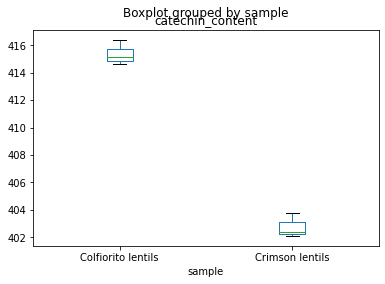

In [5]:
# data.boxplot(by='sample', column =['catechin_content'], grid=False)
# data[data['catechin_content'] > 400].boxplot(column='catechin_content', by='sample', grid=False)
data[(data['catechin_content'] >= 400) & (data['catechin_content'] <= 450)].boxplot(column='catechin_content', by='sample', grid=False)

## OLS Model
Construct a Ordinary Least Squares (OLS) model

In [6]:
model = ols('catechin_content ~ C(sample)', data=data).fit()

## Perform Oneway ANOVA and print ANOVA table

In [7]:
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(sample),2.150372e+06,20.0,112819.313141,6.635393e-93
Residual,4.002667e+01,42.0,NaN,NaN


# Perform Oneway ANOVA using Scipy library

In [8]:
import scipy.stats as stats

In [9]:
data_catechin = data[['sample', 'catechin_content']]
data_catechin

,sample,catechin_content
0,Black beans,14.1
1,Black beans,16.0
2,Black beans,14.4
3,Black chickpeas,187.1
4,Black chickpeas,189.6
...,...,...
58,Stregoni beans,459.8
59,Stregoni beans,458.2
60,Verdolino beans,82.7
61,Verdolino beans,83.9


# Transform the dataframe to pivot form

In [12]:
#data_catechin.pivot(columns='sample', values='catechin_content')
data_catechin_pivot = pd.concat({k: g.reset_index(drop=True) for k, g in data_catechin.groupby('sample')['catechin_content']}, axis=1)
data_catechin_pivot

,Black beans,Black chickpeas,Black lentils,Broad beans,Brown beans,Brown lentils,Colfiorito lentils,Cramberry beans,Crimson lentils,Dehulled eston lentils,...,Eston lentils,Kabuli chickpeas,Laird lentils,Pavoni beans,Pinto beans,Red kidney beans,Ruviotto beans,Saluggia beans,Stregoni beans,Verdolino beans
0,14.1,187.1,246.5,455.6,10.8,118.9,415.1,614.3,402.4,85.3,...,478.4,31.8,520.1,302.9,322.3,60.6,61.6,279.2,457.9,82.7
1,16.0,189.6,247.9,457.9,12.4,120.4,416.4,615.5,403.8,87.1,...,480.8,33.6,522.1,304.1,323.4,62.8,63.3,280.9,459.8,83.9
2,14.4,187.8,246.3,456.0,11.0,119.1,414.6,614.3,402.1,86.0,...,479.0,31.9,520.4,302.3,321.8,61.3,61.4,279.2,458.2,82.8


### View Columns

In [15]:
data_catechin_pivot.columns

Index(['Black beans', 'Black chickpeas', 'Black lentils', 'Broad beans',
       'Brown beans', 'Brown lentils', 'Colfiorito lentils', 'Cramberry beans',
       'Crimson lentils', 'Dehulled eston lentils', 'Diavoli beans',
       'Eston lentils', 'Kabuli chickpeas', 'Laird lentils', 'Pavoni beans',
       'Pinto beans', 'Red kidney beans', 'Ruviotto beans', 'Saluggia beans',
       'Stregoni beans', 'Verdolino beans'],
      dtype='object')

In [ ]:
### Manually perform oneway anova between groups

In [16]:
fvalue, pvalue = stats.f_oneway(data_catechin_pivot['Black beans'], data_catechin_pivot['Black chickpeas'], data_catechin_pivot['Black lentils'])

In [17]:
fvalue

37795.23461522067

In [18]:
pvalue

4.999760659952581e-13

# Tukey HSD Test
Following example will use pinguin library to compute Tukey highest significance difference test

In [20]:
from pingouin import pairwise_tukey

In [21]:
m_comp = pairwise_tukey(data=data, dv='catechin_content', between='sample')
m_comp

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Black beans,Black chickpeas,14.833333,188.166667,-173.333333,0.797085,-217.459133,0.001000,-142.043711
1,Black beans,Black lentils,14.833333,246.900000,-232.066667,0.797085,-291.144323,0.001000,-190.174676
2,Black beans,Broad beans,14.833333,456.500000,-441.666667,0.797085,-554.102597,0.001000,-361.938301
3,Black beans,Brown beans,14.833333,11.400000,3.433333,0.797085,4.307364,0.006832,2.813558
4,Black beans,Brown lentils,14.833333,119.466667,-104.633333,0.797085,-131.270042,0.001000,-85.745232
...,...,...,...,...,...,...,...,...,...
205,Ruviotto beans,Stregoni beans,62.100000,458.633333,-396.533333,0.797085,-497.479585,0.001000,-324.952304
206,Ruviotto beans,Verdolino beans,62.100000,83.133333,-21.033333,0.797085,-26.387829,0.001000,-17.236458
207,Saluggia beans,Stregoni beans,279.766667,458.633333,-178.866667,0.797085,-224.401097,0.001000,-146.578183
208,Saluggia beans,Verdolino beans,279.766667,83.133333,196.633333,0.797085,246.690658,0.001000,161.137663


# Test ANOVA assumptions
Following example will perform Shapiro Wilks Test and Levene or Bartlett Test on the OLS model

In [22]:
import scipy.stats as stats

In [27]:
w, pvalue = stats.shapiro(model.resid)
print(w, format(pvalue, '.8f'))

0.8247541785240173 0.00000036


The **Shapiro-Wilk test** can be used to check the normal distribution of residuals where **Null hypothesis** is data is drawn from normal distribution. As the P-value is significant, we reject the null hypothesis and conclude that data is not drawn from normal distribution.

As data is not drawn from normal distribution, **Levene test** can be used to check the Homogeneity of variances Null hypothesis is samples from land races of pulses have equal variances.

In [28]:
# w, pvalue = stats.levene(data_catechin_pivot['Black beans'], data_catechin_pivot['Black chickpeas'], data_catechin_pivot['Black lentils'], ...)
w, pvalue = stats.levene(*(data_catechin_pivot[col] for col in data_catechin_pivot.columns))
print(w, pvalue)

0.06690176322417939 0.9999999866012517


As the P-value is non significant, we fail to reject null hypothesis and conclude that samples have equal variances.

If the data is drawn from normal distribution, use **Bartlett’s test** to check the Homogeneity of variances where

In [ ]:
# w, pvalue = stats.bartlett(data_catechin_pivot['Black beans'], data_catechin_pivot['Black chickpeas'], data_catechin_pivot['Black lentils'], ...)
# w, pvalue = stats.bartlett(*(data_catechin_pivot[col] for col in data_catechin_pivot.columns))
# print(w, pvalue)